# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [82]:
m = 1
A = 0.001#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [83]:
global loggrid=false
global bisection=false
global meshrefinement=false;

In [84]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0
Xf=1.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*400.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [85]:
print(N)

400.0

In [86]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [87]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [88]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.0025
the time step is 0.00125


In [89]:
"""using Plots
plot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])"""

"using Plots\nplot([originalX[4:L-3] originalX[4:L-3]], [initX[4:L-3] analytic_jacobian(originalX[4:L-3])],xlim=[0,1])"

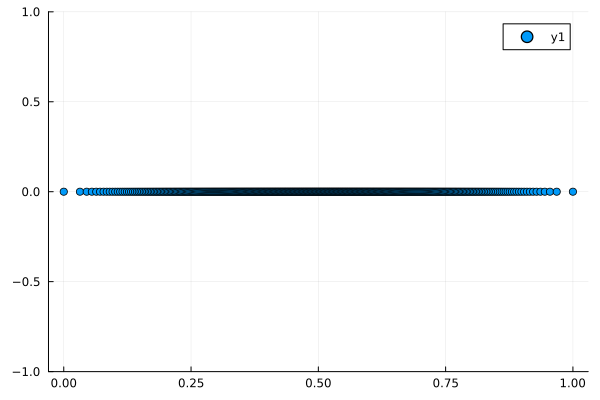

In [92]:
scatter(inverse.(initX1), zeros(L-6), ylim=[-1,1])

# Initial data of m β Ψ and Ψ,x

In [58]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)

#PSI
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [59]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [60]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [61]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

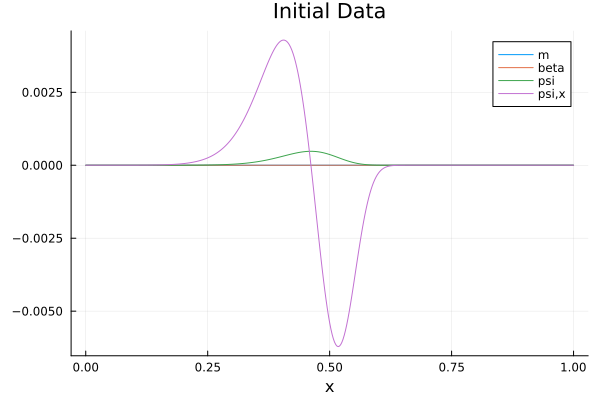

In [62]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

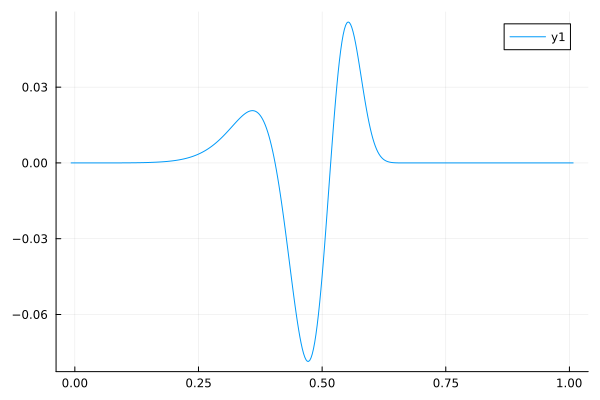

In [63]:
dy=zeros((L,length(state_array[1,:])));

for i in 4:L-3 #ORI
    if initX[i]<10^(-15) #left
        dy[i,4]= 0.0 - dissipation4(state_array,i,0.02)[4];

    elseif initX[i] < (1-10^(-15)) #bulk
        dy[i,4]=bulkSF(state_array,i,initX) - dissipation4(state_array,i,0.02)[4]

    else #right
        dy[i,4]= bulkSF(state_array,i,initX) - dissipation4(state_array,i,0.02)[4]
    end
end


plot(initX, dy[:,4])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [64]:
using CSV, Tables
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [65]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [66]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

2.0100376253918


In [67]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [71]:
finaltime=1.3
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 1 dt is 0.00125, t=0.00125 speed is 0.49750312500000005, dx/dt=2.0


iteration 2 dt is 0.00125, t=0.0025 speed is 0.49750312500000005, dx/dt=2.0


iteration 3 dt is 0.00125, t=0.00375 speed is 0.49750312500000005, dx/dt=2.0


iteration 4 dt is 0.00125, t=0.005 speed is 0.49750312500000005, dx/dt=2.0


iteration 5 dt is 0.00125, t=0.00625 speed is 0.49750312500000005, dx/dt=2.0


iteration 6 dt is 0.00125, t=0.007500000000000001 speed is 0.49750312500000005, dx/dt=2.0


iteration 7 dt is 0.00125, t=0.00875 speed is 0.49750312500000005, dx/dt=2.0


iteration 8 dt is 0.00125, t=0.01 speed is 0.49750312500000005, dx/dt=2.0


iteration 9 dt is 0.00125, t=0.01125 speed is 0.49750312500000005, dx/dt=2.0


iteration 10 dt is 0.00125, t=0.012499999999999999 speed is 0.49750312500000005, dx/dt=2.0


iteration 11 dt is 0.00125, t=0.013749999999999998 speed is 0.49750312500000005, dx/dt=2.0


iteration 12 dt is 0.00125, t=0.014999999999999998 speed is 0.49750312500000005, dx/dt=2.0


i



iteration 93 dt is 0.00125, t=0.11625000000000008 speed is 0.49750312499997384, dx/dt=2.0


iteration 94 dt is 0.00125, t=0.11750000000000008 speed is 0.49750312499995414, dx/dt=2.0


iteration 95 dt is 0.00125, t=0.11875000000000008 speed is 0.4975031249999268, dx/dt=2.0


iteration 96 dt is 0.00125, t=0.12000000000000008 speed is 0.4975031249998915, dx/dt=2.0


iteration 97 dt is 0.00125, t=0.12125000000000008 speed is 0.49750312499984806, dx/dt=2.0


iteration 98 dt is 0.00125, t=0.12250000000000008 speed is 0.49750312499979793, dx/dt=2.0


iteration 99 dt is 0.00125, t=0.12375000000000008 speed is 0.49750312499974286, dx/dt=2.0


iteration 100 dt is 0.00125, t=0.12500000000000008 speed is 0.49750312499968663, dx/dt=2.0


iteration 101 dt is 0.00125, t=0.12625000000000008 speed is 0.4975031249996334, dx/dt=2.0


iteration 102 dt is 0.00125, t=0.12750000000000009 speed is 0.4975031249995889, dx/dt=2.0


iteration 103 dt is 0.00125, t=0.1287500000000001 speed is 0.4975031249995588, 



iteration 184 dt is 0.00125, t=0.23000000000000018 speed is 0.49750299416704685, dx/dt=2.0


iteration 185 dt is 0.00125, t=0.23125000000000018 speed is 0.497502998742495, dx/dt=2.0


iteration 186 dt is 0.00125, t=0.23250000000000018 speed is 0.4975030121410915, dx/dt=2.0


iteration 187 dt is 0.00125, t=0.23375000000000018 speed is 0.49750303382781363, dx/dt=2.0


iteration 188 dt is 0.00125, t=0.23500000000000018 speed is 0.4975030615309934, dx/dt=2.0


iteration 189 dt is 0.00125, t=0.23625000000000018 speed is 0.49750309085529837, dx/dt=2.0


iteration 190 dt is 0.00125, t=0.23750000000000018 speed is 0.49750311504525446, dx/dt=2.0


iteration 191 dt is 0.00125, t=0.23875000000000018 speed is 0.49750312498873367, dx/dt=2.0


iteration 192 dt is 0.00125, t=0.24000000000000019 speed is 0.49750310954864213, dx/dt=2.0


iteration 193 dt is 0.00125, t=0.2412500000000002 speed is 0.4975030562965954, dx/dt=2.0


iteration 194 dt is 0.00125, t=0.2425000000000002 speed is 0.4975029526917

In [ ]:
plot init state array in terms of originalX (unevenly spaced)
fix adaptive timestep

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/newgrid/N2000_A0.001.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/newgrid/N2000_A0.001.gif")
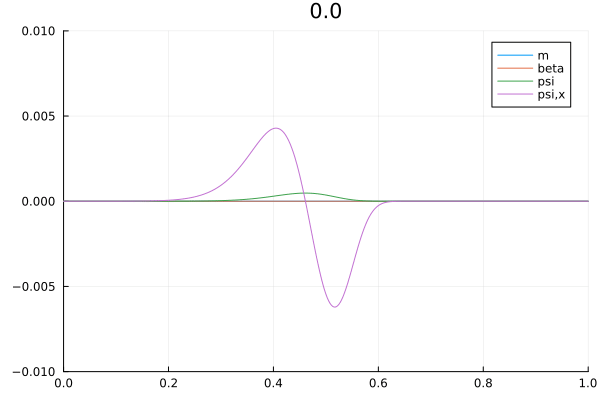

In [72]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 1:277
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

In [139]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [140]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

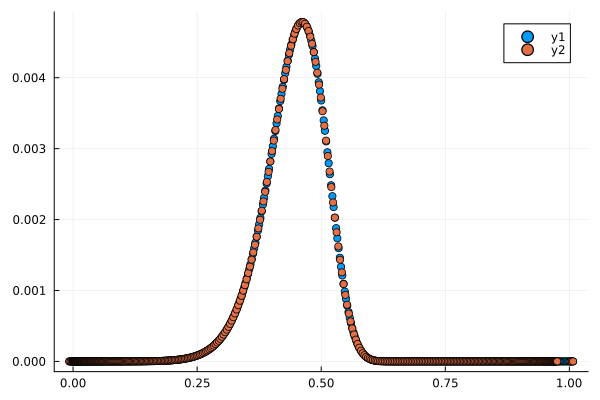

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

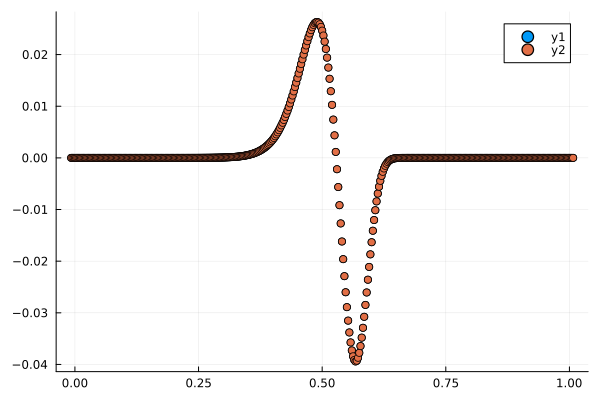

In [417]:
scatter([x1,x1],[y1,y2])